In [ ]:
import sys
sys.path.append(".")
from py_ballisticcalc.interface import *

# Minimal example

In [2]:
# Describe a bullet and give its muzzle velocity
mediumBullet = Bullet(0.22, 0.308, 168, 1.22, 2600)
# Set the zero distance
zero = 400
# Instantiate the calculator
c = Calculator(mediumBullet, zeroDistance=zero)
# Here's some calculations it can do:
print(f'Created {c}'
      f'\nBarrel elevation for {zero}{UNIT_DISPLAY[c.distanceUnits].units} zero: {c.elevationForZeroDistance():.1f}{UNIT_DISPLAY[c.angleUnits].units}'
      f'\nDanger space for 10" target at zero distance: {c.dangerSpace(c.zeroGivenElevation(c.elevationForZeroDistance()), 10):.0f}{UNIT_DISPLAY[c.distanceUnits].units}'
      )

Created Calculator(bullet=Bullet(BC=0.22, caliber=0.308, grains=168, length=1.22, muzzleVelocity=2600, velocityUnits=62), gun=Gun(sightHeight=0, heightUnits=10, barrelTwist=0, twistUnits=10), air=Air(altitude=0, altUnits=11, pressure=29.92, pressureUnits=41, temperature=59, tempUnits=50, humidity=0, windSpeed=0, windUnits=63, windDirection=0), elevation=0, zeroDistance=400, distanceUnits=12, heightUnits=10, angleUnits=2)
Barrel elevation for 400yd zero: 12.4MOA
Danger space for 10" target at zero distance: 61yd


In [3]:
# Request a trajectory table in 100-yard increment out to 1000 yards or Mach 1, whichever comes first
c.trajectory(1000, 100, stopAtMach1=True)

,Velocity fps,Angle MOA,Mach,Time,Drop in.,DropAngle MOA,Windage in.,WindageAngle MOA,Note
Distance yd,,,,,,,,,
0.0,2600.0,12.39,2.33,0.000,-0.0,0.00,0.0,0.0,
100.0,2398.0,7.06,2.15,0.120,10.3,9.79,0.0,0.0,
200.0,2205.0,0.78,1.98,0.251,14.5,6.90,0.0,0.0,
300.0,2022.0,-6.67,1.81,0.393,11.5,3.66,0.0,0.0,
400.0,1848.0,-15.55,1.65,0.548,-0.0,-0.00,0.0,0.0,Zero
500.0,1680.0,-26.25,1.50,0.718,-21.7,-4.15,0.0,0.0,
600.0,1519.0,-39.25,1.36,0.906,-55.8,-8.88,0.0,0.0,
700.0,1366.0,-55.25,1.22,1.114,-105.0,-14.32,0.0,0.0,
800.0,1221.0,-75.17,1.09,1.347,-172.9,-20.64,0.0,0.0,


## Plot

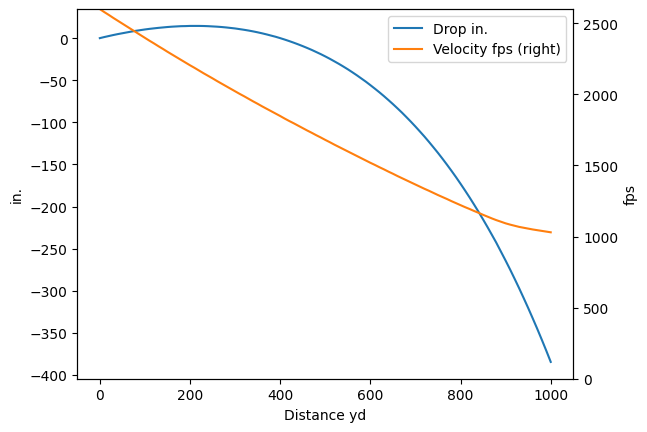

In [4]:
import matplotlib.pyplot as plt
df = c.trajectory(1000, 10)  # Step in 10-yard increments to produce smoother curves
ax = df.plot(y=[c.tableCols['Drop'][0]], ylabel=UNIT_DISPLAY[c.heightUnits].units)
df.plot(y=[c.tableCols['Velocity'][0]], ylabel=UNIT_DISPLAY[c.bullet.velocityUnits].units, secondary_y=True, ylim=[0, df[c.tableCols['Velocity'][0]].max()], ax=ax)
plt.show()

# Full details

## Spin drift

In [5]:
# If we specify a barrel twist on the gun then the calculator includes the Litz spin-drift approximation 
cspin = Calculator(mediumBullet, gun=Gun(barrelTwist=12), zeroDistance=zero)
cspin.trajectory(1000, 100)

,Velocity fps,Angle MOA,Mach,Time,Drop in.,DropAngle MOA,Windage in.,WindageAngle MOA,Note
Distance yd,,,,,,,,,
0.0,2600.0,12.39,2.33,0.000,-0.0,0.00,0.0,0.00,
100.0,2398.0,7.06,2.15,0.120,10.3,9.79,0.1,0.07,
200.0,2205.0,0.78,1.98,0.251,14.5,6.90,0.3,0.14,
300.0,2022.0,-6.67,1.81,0.393,11.5,3.66,0.7,0.21,
400.0,1848.0,-15.55,1.65,0.548,-0.0,-0.00,1.2,0.29,Zero
500.0,1680.0,-26.25,1.50,0.718,-21.7,-4.15,2.0,0.37,
600.0,1519.0,-39.25,1.36,0.906,-55.8,-8.88,3.0,0.48,
700.0,1366.0,-55.25,1.22,1.114,-105.0,-14.32,4.4,0.60,
800.0,1221.0,-75.17,1.09,1.347,-172.9,-20.64,6.2,0.74,
